1. **Getting Started**

What to expect in this  first lesson


1.   Introduction to  tensors
2.   Getting information from tensors
3.   Manipulating tensors
4.   Tensors and NumPy
5.   Using @tf.function (a method to speed up regular python functions)
6.   Using GPU's with Tensorflow (or TPU's)
7.   Exercises

# **a. Introduction to Tensors**

In [ ]:
#import TensorFlow 
import tensorflow as tf

In [ ]:
#Check the version of Tensorflow
print(tf.__version__)

2.5.0


tf.constant()
Creates a constant tensor from a tensor-like object.

In [ ]:

# tf.constant(
#     value, dtype=None, shape=None, name='Const'
# )

## **i). creating tensors with `tf.constant()`**

In [ ]:
#creating tensors with tf.constant()
scalar1 = tf.constant(7)
scalar1

<tf.Tensor: shape=(), dtype=int32, numpy=7>

###1. **Creating Scalars**

In [ ]:
# Constant 1-D Tensor from a python list.
scalar2 = tf.constant([1, 2, 3, 4, 5, 6])
scalar2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [ ]:
# Tensor from a numpy array
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
tf.constant(a)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [ ]:
#If dtype is specified, the resulting tensor values are cast to the requested dtype.
scalar3 = tf.constant([1, 2, 3, 4, 5, 6], dtype=tf.float64)
scalar3


<tf.Tensor: shape=(6,), dtype=float64, numpy=array([1., 2., 3., 4., 5., 6.])>

In [ ]:
#If shape is set, the value is reshaped to match. Scalars are expanded to fill the shape:
scalar4 = tf.constant(0, shape=(2, 3))
scalar4

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)>

#### **Checking the dimension of a tensor**

In [ ]:
scalar1

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#ndim stands for number of dimensions
scalar1.ndim

0

In [ ]:
scalar2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [ ]:
scalar2.ndim

1

In [ ]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a.ndim

2

In [ ]:
scalar3

<tf.Tensor: shape=(6,), dtype=float64, numpy=array([1., 2., 3., 4., 5., 6.])>

In [ ]:
scalar3.ndim

1

In [ ]:
scalar4

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)>

In [ ]:
scalar4.ndim

2

### **2. Create a vector**

In [ ]:
#We will create a tensor and pass it a python list
vector1 =tf.constant([10,10])
vector1

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

#### **Check the dimension of our Vector**

In [ ]:
#Check the dimension of our Vector
vector1.ndim

1

###3.**Create a matrix( has more than 1 dimension )**


In [ ]:
matrix = tf.constant(([10,7],[7,10]))
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

#### **check the dimension of our matrix**

In [ ]:
#check the dimension of our matrix
matrix.ndim

2

So what we get is that the number on the items in the shape is the ndim

In [ ]:
#Create another matrix

another_matrix = tf.constant([[10.,7,],[3.,2.],[8.,9.]], dtype= tf.float16) # specify the datatype with the  dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
#Let us find the number of dimensions for another Matrix
another_matrix.ndim

2

###4. **Create a tensor**

In [ ]:
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

#### **Check the number of ndims**

In [ ]:
tensor.ndim

3

###5. **Summary**

NB. So the total dimensions id the numbers in the shape.

* A scalar has no dimensions.

* A Vector has 1 dimension.(1 demensional tensor)

* A Matrix has 2 dimensions.(2 dimensional tensor)

* A tensor han n number of dimensions( n dimensional tensor)

1. ***Scalar*** - Single number

2. ***Vector*** - A number with direction eg windspeed

3. ***Matrix*** - is a 2 dimensional array of numbers

4. ***Tensor*** - an n-dimensional array of numbers



## ii). **Create tensors with `tf.variable`**

A variable maintains shared, persistent state manipulated by a program.

The Variable() constructor requires an initial value for the variable, which can be a Tensor of any type and shape. 

This initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. 

The value can be changed using one of the assign methods.

In [ ]:
# tf.Variable(
#     initial_value=None, trainable=None, validate_shape=True, caching_device=None,
#     name=None, variable_def=None, dtype=None, import_scope=None, constraint=None,
#     synchronization=tf.VariableSynchronization.AUTO,
#     aggregation=tf.compat.v1.VariableAggregation.NONE, shape=None
# )

In [ ]:
#Create the same tensors using  tensor with tf.variable() as above

changeable_tensor = tf.Variable([10,7])
changeable_tensor


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [ ]:
unchangeable_tensor = tf.constant([10,7])
unchangeable_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>

So, what will happen when we change the elements in our changeable tensor?

In [ ]:
#Get the first element and name it 7
changeable_tensor[0]= 7
changeable_tensor

TypeError: ignored

In [ ]:
#We get an error , so we need to find another way to solve this. How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

This means it now works perfectly!

Now lets try to change a value in the unchangeable tensor

In [ ]:
unchangeable_tensor[0] = 7

TypeError: ignored

We get an error, however , we could use Assign which has worked for us before.

In [ ]:
unchangeable_tensor[0].assign(7)

AttributeError: ignored

We get an unchangeable tensor[0] that cannot change.

🔑 **NOTE** :Rarely will you need to decide whether to use `tf.constant` or tf.variable to create tensors as  Tensorflow will do  this for you.

However if in doubt, use `tf.constant` and change it later if needed.

##iii). **Creating Random Tensors**

Random Tensors are tensors of some abitrary size which contain random numbers

In [ ]:
# tf.random.uniform(
#     shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None
# )

In [ ]:
#Outputs random values from a uniform distribution.

In [ ]:
#Create two random but the same tensors.

In [ ]:
random1 = tf.random.Generator.from_seed(42)
random1 = random1.normal(shape = (3,2))
random1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
random2 = tf.random.Generator.from_seed(42)
random2 = random2.normal(shape = (3,2))
random2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

**Despite both of them being random, are they equal?**

Lets check

In [ ]:
random1 ==random2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

We get True for all positions meaning both of them are Equal.

Shuffling the elements in a tensor

First , why would one want to shuffle the elements of a tensor?


If we have a set of data either in a folder or a set, eg. classifying friuts and we have all first 100 fruits as bananas and the next 100 fruits as Oranges, when we feed that data into a neural network, it would affect by adjusting the weights. 


So instead, its great to mix up the items and randomize them so as to learn different types of friuts.


**NOTE** ***->*** Shuffling is important so that the inherent order does not affect learning. 



In [ ]:
not_shuffled = tf.constant([[10,7],[2,4],[5,9]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  4],
       [ 5,  9]], dtype=int32)>

In [ ]:
#check the dimension
not_shuffled.ndim

2

We will use `tf.random.uniform`

In [ ]:
#check the shape
# tf.random.uniform(
#     shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None
# )

In [ ]:
#Now lets shuffle it.
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  4],
       [ 5,  9]], dtype=int32)>

This shows it has shuffled the items in the dimension perspective

In [ ]:
#Lets shuffle it again and run it severally. 
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  4],
       [ 5,  9]], dtype=int32)>

In [ ]:
#However if we set seed lets see what happens and run it severally.
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  4],
       [ 5,  9]], dtype=int32)>

🛠 Exercise: Read on Random tensors and Shuffling.

In [ ]:
#Using an operational level seed
tf.random.shuffle(not_shuffled, seed = (42))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5,  9],
       [10,  7],
       [ 2,  4]], dtype=int32)>

In [ ]:
# Set the global variable and the operational variable and shuffle severally. 
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed = (42))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  4],
       [ 5,  9]], dtype=int32)>

> It looks like our shuffled tensors to be in order, we,ve got to use the global level random seed as well as the operational level random seed.

> If both the global and the operational seed  are set: Both seeds are used in conjuction to determine the random sequence. 



##**iv. Other ways to make Tensors**

In [ ]:
#Create a tensor of all ones
tf.ones([3,4], tf.int32)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)>

In [ ]:
tf.ones([10,7])


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Create a tensor of all zeros.

tf.zeros(shape = (3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#You can also turn Numpy arrays into Tensors

**Q.** The Difference of Numpy arrays and Tensorflow flows

> ***The main Difference between Numpy arrays and Tensorflow tensors is  that tensors can be run on a GPU (much fast for numerical computing)***

In [ ]:
import numpy as np
numpy_A = np.arange(1,25, dtype = np.int32)

#X = tf.constant(some_matrix) #capital for matrix or tensor
#Y = tf.constant(vector) #NOn capital for vector

In [ ]:
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

Turning a Numpy Array into an tensor

In [ ]:
converted_np_to_tensor = tf.constant(numpy_A)
converted_np_to_tensor 

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
#Changing the tensors shape
import tensorflow as tf

In [ ]:
converted_np_to_tensor1 = tf.constant(numpy_A, shape = (2,3,4))
converted_np_to_tensor1

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [ ]:
#Display both of the tensors
converted_np_to_tensor1, converted_np_to_tensor


(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

#**b).Getting information from tensors**

> When dealing with tensors we will need to get information from tensors using the following attributes.

Some of the information that we will need is;

 

*   ***Shape*** ~ The length of each of the dimensions of a Tensor `tensor.shape`
*   ***Rank***  ~ The number of Tensor Dimensions. A scalar has  rank 0 , a vector has a rank 1, a matrix has a rank 2, a tensor has a rank n. `tensor.ndim`
*   ***Axis or dimension*** ~ A particular dimension of a tensor `tensor[0], tensor[:, 1]...` 
*   ***Size*** ~ The total number of items in a tensor `tf.size(tensor)`



In [ ]:
#Create a rank 4 Tensor

rank_4_tensor = tf.zeros(shape = (2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
#Get the Zeroth  Element

rank_4_tensor[0]



<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
#This means we get a segment of the 2 that was in the shape. Hence this will now contain shape as 
#shape(3,4,5) because we have removed the first segment.

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim , tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
#The 120 is obtained from 2*3*4*5. , the ndim is calculated by counting the number of items in the shape.

Get various attributes of our tensor.

In [ ]:
#using the print statement
print("Datatype of every elelement: ", rank_4_tensor.dtype)
print("Number of dimensions (rank): ",rank_4_tensor.ndim)
print("Shape of the tensor: ", rank_4_tensor.shape)
print("Elelents along 0 axis: ",rank_4_tensor.shape[0])
print("Elements along the last axis: ",rank_4_tensor[-1])
print("Total number of elements in our tensor: ",tf.size(rank_4_tensor))
print("Total number of elements in our tensor: ",tf.size(rank_4_tensor).numpy())

Datatype of every elelement:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of the tensor:  (2, 3, 4, 5)
Elelents along 0 axis:  2
Elements along the last axis:  tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 4, 5), dtype=float32)
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor:  120


**Indexing Tensors**

Tensors can be indexed such as python lists

In [ ]:
#Get the first 2 ellements of each dimension.

rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
#Get the first element from each dimension from each index except for the final one.
rank_4_tensor[ :1, :1, :1] #OR

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[ :1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

Create a rank 2 tensor (2 dimensions)

In [ ]:
rank_2_tensor = tf.constant([[10,7],[3,4]])
rank_2_tensor.shape , rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
#Get the last item of each row of our rank 2 tensor

rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
#Adding an extra dimension to our rank tensor. Turning rank 2 tensor to rank 3 tensor but keepin the exact information
#that is stored in our rank 2 tensor. (No changing the numbers , just the shape the numbers fit into)

rank_3_tensor = rank_2_tensor[..., tf.newaxis] 
#which can also be executed as 
#rank_3_tensor = rank_2_tensor[:,:, tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Another alternative to tf.newaxis

tf.expand_dims(rank_2_tensor, axis =-1) # -1 means expand the final axis.

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

Expands _dims Returns a tensor with a length 1 axis inserted at index axis.

In [ ]:
#Lets try with a new axis.
tf.expand_dims(rank_2_tensor, axis =0) # 0 means expand the first axis.

#in the result our extra dimension is at the front.

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

#**c).Math and tensors**

**1. Manipulating tensors(tensor operations)**

In [ ]:
#If data is stored in tensor formats finding patterns in tensor formats ofter involves Manipulating tensors.

Basic operators

+,-,*,/

You can add values to a tensor using the addition operator

In [ ]:
#Addition 
tensor = tf.constant([[10,7],[3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
#Multiplication . This is called Scalar multiplication or Element multiplication.

tensor *10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
#Subtraction 

tensor -10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
#We can use the tensorflow built-in function too.
tf.multiply(tensor, 10)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

**Matrix multiplication**

In Machine Learning, Matrix multiplication is one of the most common tensor operations.

For here , we need to do the dot product, and not the scalar multiplication

To understand this type of multiplication check it out here [Matrix Multiplication](http://matrixmultiplication.xyz/)


There are two rules our tensors (or matrices) need to fulfil if we are going to Matrix multiply them.
The rules are as follows.
> 1. The inner Dimensions must match.
> 2. The resulting matrix has the shape of the outer dimensions.

`tf.linalg.matmul`

Multiplies matrix a by matrix b, producing a * b.

In [ ]:
print(tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


In [ ]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Without the matmul it will only give the element-wise product as shown in  the next cell

In [ ]:
tensor*tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
#Matrix multiplication with Python operator @
tensor @ tensor
#Which will give result same as the multiplied using matmul

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor.shape

TensorShape([2, 2])

Multiply On different shapes

In [ ]:
#Create a tensor of (3,2)

X = tf.constant([[1,2],[3,4,],[5,6]])
print(X)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [ ]:
#Create another (3,2) tensor
Y =tf.constant([[7,8],[9,10],[11,12]])
print(Y)

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)


In [ ]:
#Multiply the two tensors
X @ Y

InvalidArgumentError: ignored

In [ ]:
# We get an incompatibility / mismatch error when the matrix is 3by2
#WHat if we try the other method of matmul

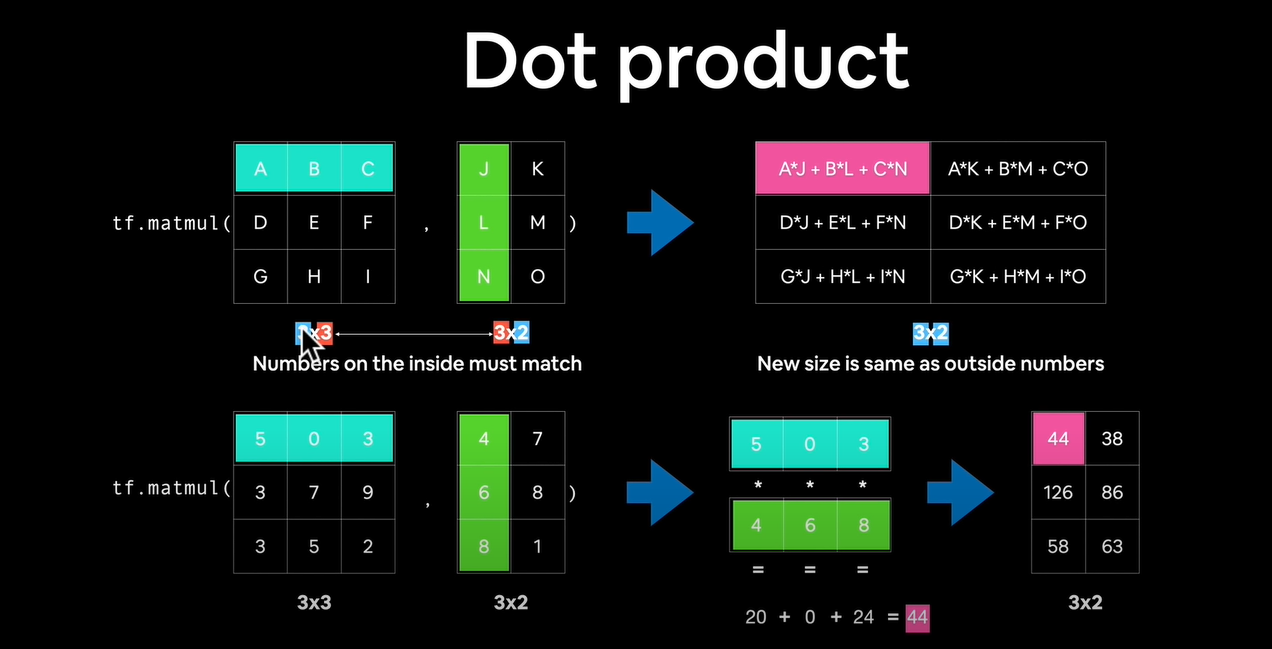

In [ ]:
#Matrix manipulation is also called Dot product , we will use it to solve our issue with the errors above.

In [ ]:
#WE do this by first changing the shape.

In [ ]:
#Lets see the original first
print(Y)

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)


In [ ]:
reshaped_y =tf.reshape(Y, shape = (2,3))
reshaped_y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

Take a keen note in the shape change that has changed from (3,2) to (2,3)

In [ ]:
#Now lets try to multiply with the reshaped Y
X @ reshaped_y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(X,reshaped_y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

We now get  the correct answers of a 3 by 3 matrix.

❓What if we reshaped the X instead of Y?

In [ ]:

tf.matmul(tf.reshape(X , shape= (2,3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

❓ Why is  the answer in a 2 by 2 Dimension?

💠Answer - The resulting matrix is a 2*2 because it the outer dimensions.How do we prove the outer dimensions. Let's check it up  by doing the shapes.

In [ ]:
tf.reshape(X, shape =(2,3)).shape , Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [ ]:
#As you can see the top matrices the outer digits are 2 and 2 which make the result a 2*2

In [ ]:
#The above 3 *3 output was as the following  due to the outer dimension shape result as shown below

In [ ]:
Y.shape,tf.reshape(X, shape =(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

🛠 Transpose is almost same as reshape but with different results.

In [ ]:
#Lets inspect and make our observations.

X,tf.transpose(X),tf.reshape(X, shape= (2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

> ***Transpose*** -will flip axes.

> ***Reshape*** - shuffles the tensor to the specified shape

So, lets try Matrix Multiplication with transpose rather than reshape.

In [ ]:
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The Dot product**

Matrix Multiplication is also called **Dot product**

* You can perform  Matrix Multiplication using

>  `tf.matmul()`

> `tf.tensordot()`

> `@`

Performing the Dot product on X and Y (requires X or Y to be transposed)


In [ ]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
tf.tensordot(tf.transpose(X), Y, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**Tensordot (also known as tensor contraction)** 

sums the product of elements from a and b over the indices specified by a_axes and b_axes.

In [ ]:
 #Just know that Reshape and Transposing has different answers.

Perform Matrix multiplication between X and Y (transposed)

In [ ]:
#Perform Matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
#Perform Matrix multiplication between X and Y (reshaped)
tf.matmul(X,tf.reshape(Y,shape = (2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Lets check shape of Y, reshaped Y and Transposed Y

In [ ]:
print("Normal Y: ",Y)
print("****************************")
print("Reshaped Y to (2,3): ",tf.reshape(Y, shape = (2,3)))
print("****************************")
print("Transposed Y: ",tf.transpose(Y))

Normal Y:  tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)
****************************
Reshaped Y to (2,3):  tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32)
****************************
Transposed Y:  tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


Generally, when performing matrix multiplication on two tensors and one of the axis does not line up , you will transpose rather than reshapeone of the tensors to satisfy matrix multiplication rules.

**Changing the datatype of the tensor**

# **e).Tensors and Datatypes**

The default of most tensors is int 32. However, one can change these in some methods below.

## Changing the datatype of tensors

In [ ]:
#Creating Tensors with default Float32 instead of Int32
#The data types are defined by the info in the tensor.
b = tf.constant([1.7,1.4])
#Check dtype
b.dtype

tf.float32

In [ ]:
c= tf.constant([7,10])
c.dtype

tf.int32

In [ ]:
#Change from float32 to float16(Reduced precision)

Today, most models use the **float32 dtype**, which takes **32 bits of memory**. However, there are two lower-precision dtypes, **float16** and **bfloat16**, each which take 16 bits of memory instead. Modern accelerators can run operations faster in the 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.

In [ ]:
#To change we will use Cast. 
#Casts a tensor to a new type.

In [ ]:
b= tf.cast(b, tf.int32)
b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1], dtype=int32)>

In [ ]:
#Change from int32 to float32
e =tf.cast(c, tf.float32)
e

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [ ]:
#Change float32 to float16
f = tf.cast(e,tf.float16)
f

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

# **f).Aggregation of tensors**

**Aggregating tensors** is condesning them from mutiple values down to a smaller amount of values.

i). Getting the absolute values

In [ ]:
D = tf.constant([-7,-10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
#to get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Different forms of aggregation

* Get the minimum.

* Get the maximum.

* Get the sum of the tensor.

* Get the mean of the tensor.

In [ ]:
#To practice , we will create a random tensor with values between 0 and 100 of size 50.

E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 5, 65, 97, 73,  6, 24, 25, 42, 49, 31,  4, 14, 50, 17, 88, 93, 54,
       92, 82,  0, 25, 75, 19, 90,  0, 84, 36, 38, 77,  1, 70, 90, 10, 56,
       11, 84, 28, 75, 95, 83, 96, 39, 47, 68, 28,  0,  9, 95, 46, 22])>

In [ ]:
#Check size, shape and number of dimensions
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
#Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
#That means the lowest value is 0

In [ ]:
#Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=97>

In [ ]:
#That means the highest value is 97.

In [ ]:
#Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=48>

In [ ]:
#Find the sum 
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2408>

We will need to import tensorflow probability for variance and Standard deviation.

In [ ]:
import tensorflow_probability as tfp

In [ ]:
#Find the std
tf.math.reduce_std(tf.cast(E,dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=32.592243>

In [ ]:
#Find the variance
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1062>

In [ ]:
#Another way
tf.math.reduce_variance(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=1062.2544>

Find the positional , maximum and minimum

In [ ]:
#New  tensor for finding positional maximum and minimum tensor
tf.random.set_seed(42) 
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
#Index on our largest value position
F[tf.argmax(F)]


<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>